## Setup

In [ ]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import seaborn as sns
from matplotlib import pyplot as plt
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

from sklearn.metrics import accuracy_score

import math

In [428]:
df = pd.read_parquet('./gold/match/15/')

In [429]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 118 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    match_id                          8128 non-null   object 
 1    gameCreation                      8128 non-null   int64  
 2    gameDuration                      8128 non-null   int64  
 3    gameMode                          8128 non-null   string 
 4    gameType                          8128 non-null   string 
 5    gameVersion                       8128 non-null   string 
 6    red_winner                        8128 non-null   bool   
 7    blue_winner                       8128 non-null   bool   
 8    red_dragons                       8128 non-null   int64  
 9    red_grubs                         8128 non-null   int64  
 10   red_towers_top_taken              8128 non-null   int64  
 11   red_towers_middle_taken           8128 non-null   int6

In [430]:
meta_cols = ['match_id', 'gameCreation', 'gameDuration', 'gameMode', 'gameType',
       'gameVersion']
metadata = df[meta_cols]

In [431]:
df = df.drop(columns=['match_id', 'gameCreation', 'gameDuration', 'gameMode', 'gameType',
       'gameVersion'])

In [432]:
df = df.drop(columns=('red_winner'))

In [433]:
df = df.dropna()

In [434]:
df['blue_winner']

0       False
1       False
2        True
3       False
4        True
        ...  
8123     True
8124    False
8125    False
8126     True
8127     True
Name: blue_winner, Length: 8120, dtype: bool

## Correlations

In [167]:
X, y = df.drop(columns=['blue_winner', 'red_winner']), df['blue_winner']

In [168]:
X

,red_top_damageDoneChampions,red_top_totalDamageDone,red_top_damageTaken,red_top_gold,red_top_level,red_top_minionsKilled,red_top_xp,red_top_kills,red_top_deaths,red_top_assists,...,blue_top_damageDoneChampions,blue_top_totalDamageDone,blue_top_damageTaken,blue_top_gold,blue_top_level,blue_top_minionsKilled,blue_top_xp,blue_top_kills,blue_top_deaths,blue_top_assists
0,9718.0,45290.0,11194.0,4415.0,10.0,89.0,6434.0,0.0,1.0,0.0,...,9382,56546,13771,5153,11,120,7601,1,0,0
1,6154.0,34351.0,9154.0,3994.0,9.0,81.0,5685.0,1.0,5.0,0.0,...,10653,84975,14660,8008,11,131,8019,6,3,1
2,4749.0,51663.0,9869.0,5695.0,11.0,104.0,7560.0,4.0,0.0,0.0,...,6293,45971,7311,4935,11,119,7372,0,3,1
3,14031.0,75775.0,11635.0,7441.0,12.0,125.0,9025.0,5.0,1.0,1.0,...,7354,36907,15664,3648,9,65,5445,0,5,1
4,8065.0,34008.0,17951.0,5248.0,10.0,67.0,6654.0,2.0,6.0,1.0,...,16276,74322,16261,7456,12,113,8706,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7209.0,34525.0,10843.0,4536.0,10.0,89.0,6495.0,1.0,2.0,0.0,...,7147,42654,7511,6021,10,107,6850,2,1,0
8124,2945.0,49258.0,11202.0,5395.0,11.0,119.0,7586.0,2.0,2.0,1.0,...,10541,62146,5478,7270,12,140,9167,2,1,0
8125,5881.0,32272.0,17260.0,4400.0,9.0,78.0,5723.0,1.0,4.0,0.0,...,18903,80049,12185,7229,11,117,8354,6,1,0
8126,9744.0,53237.0,10097.0,5263.0,10.0,105.0,6993.0,2.0,3.0,0.0,...,7666,61606,13101,6276,10,97,6141,3,2,2


In [477]:
# Calcular la correlación de todas las columnas con la variable objetivo
target = 'blue_winner'
target_corr = df[list(filter(lambda s: s.startswith('blue'), df.columns))].corr()[target].drop(target).sort_values(ascending=False)

/var/folders/ym/zrlgrh6n62n9l1q5yjs2y33w0000gn/T/ipykernel_30028/478682475.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), horizontalalignment='left')


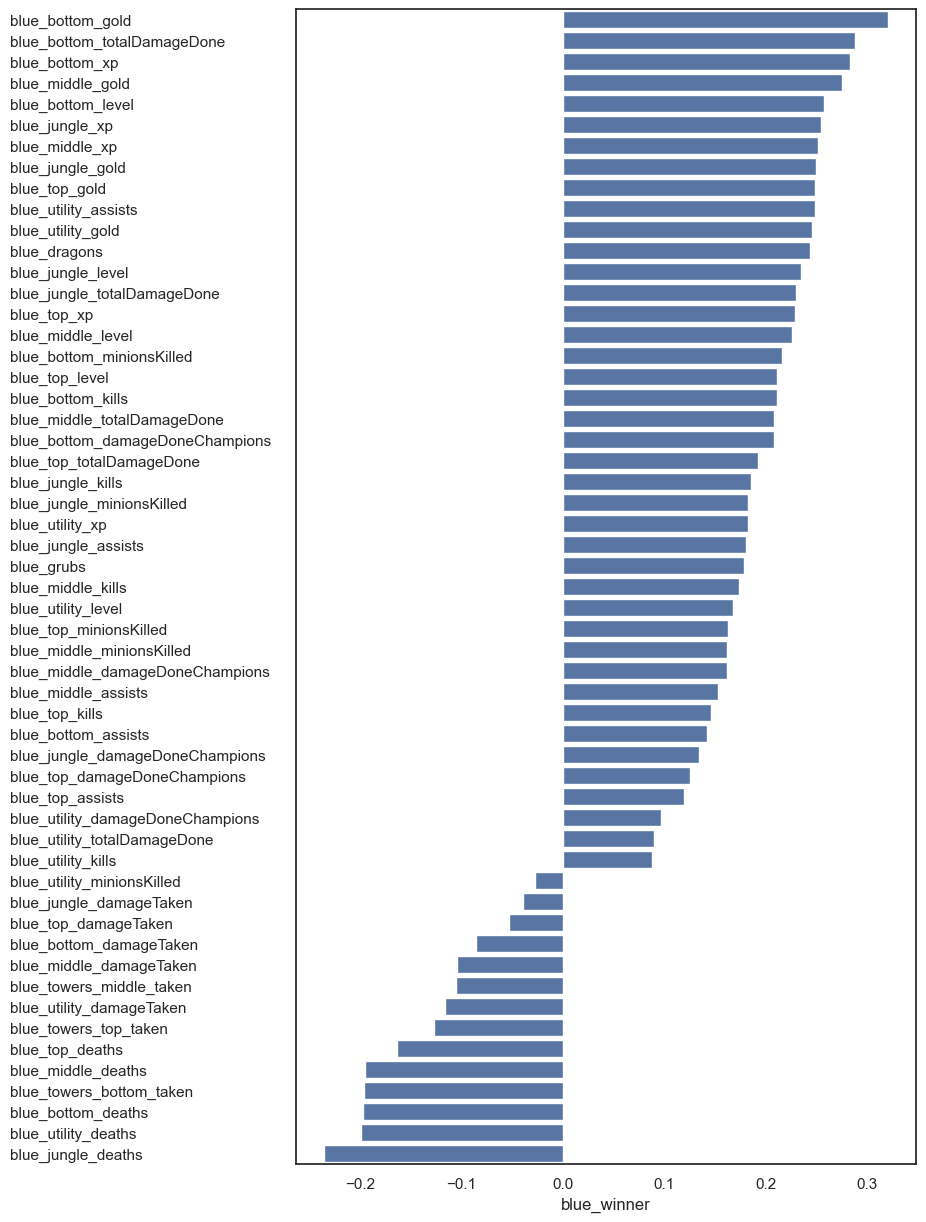

In [483]:
f, ax = plt.subplots(figsize=(8, 15))
sns.barplot(target_corr, orient='h', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), horizontalalignment='left')
ax.tick_params('y', pad=200)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [253]:
df.corr()

,blue_winner,red_top_damageDoneChampions,red_top_totalDamageDone,red_top_damageTaken,red_top_gold,red_top_level,red_top_minionsKilled,red_top_xp,red_top_kills,red_top_deaths,...,blue_top_damageDoneChampions,blue_top_totalDamageDone,blue_top_damageTaken,blue_top_gold,blue_top_level,blue_top_minionsKilled,blue_top_xp,blue_top_kills,blue_top_deaths,blue_top_assists
blue_winner,1.000000,-0.123446,-0.180027,0.064025,-0.243846,-0.220030,-0.156379,-0.233411,-0.145986,0.168230,...,0.125626,0.192896,-0.053328,0.249115,0.211409,0.163294,0.229071,0.145978,-0.163422,0.119121
red_top_damageDoneChampions,-0.123446,1.000000,0.452854,0.310219,0.531450,0.341544,0.180064,0.371398,0.549902,0.010401,...,-0.020498,-0.230716,0.704890,-0.250414,-0.308480,-0.402483,-0.324346,-0.079980,0.478656,0.020166
red_top_totalDamageDone,-0.180027,0.452854,1.000000,0.079425,0.734984,0.632866,0.741985,0.678844,0.380512,-0.264896,...,-0.234628,-0.216226,0.198502,-0.383852,-0.305704,-0.234750,-0.327221,-0.268943,0.341436,-0.096447
red_top_damageTaken,0.064025,0.310219,0.079425,1.000000,0.066258,-0.078495,-0.170966,-0.087068,0.173710,0.435618,...,0.703037,0.200463,0.343120,0.223789,0.084063,-0.077932,0.098199,0.303499,0.198062,0.156664
red_top_gold,-0.243846,0.531450,0.734984,0.066258,1.000000,0.655111,0.593097,0.713558,0.717207,-0.281241,...,-0.253988,-0.382085,0.236347,-0.472100,-0.531344,-0.449295,-0.567667,-0.271007,0.630728,-0.081366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blue_top_minionsKilled,0.163294,-0.402483,-0.234750,-0.077932,-0.449295,-0.221472,-0.081611,-0.243354,-0.425220,0.083886,...,0.170469,0.728345,-0.209991,0.589009,0.700415,1.000000,0.741536,0.125468,-0.483438,-0.078921
blue_top_xp,0.229071,-0.324346,-0.327221,0.098199,-0.567667,-0.392042,-0.238747,-0.422966,-0.471258,0.373919,...,0.369466,0.673953,-0.120477,0.718196,0.930505,0.741536,1.000000,0.412824,-0.538179,0.011418
blue_top_kills,0.145978,-0.079980,-0.268943,0.303499,-0.271007,-0.430769,-0.398026,-0.450685,-0.120144,0.751895,...,0.545905,0.359899,0.184735,0.709439,0.375674,0.125468,0.412824,1.000000,-0.089611,0.028611
blue_top_deaths,-0.163422,0.478656,0.341436,0.198062,0.630728,0.339734,0.092715,0.376041,0.758876,-0.064704,...,0.007606,-0.276594,0.435423,-0.305398,-0.503782,-0.483438,-0.538179,-0.089611,1.000000,-0.031241


In [586]:
def corr_heatmap(corr_matrix, figsize=(35, 15)):
    corr = corr_matrix
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, vmax=0.4, cmap=cmap, center=0,
                square=True, linewidths=.01, cbar_kws={"shrink": .5}, ax=ax)
    
    #ax.tick_params('both', pad=10, ha='left')
    #ax.set_xticks(ax.get_xticks(),horizontalalignment='left')
    ax.set_yticklabels(ax.get_yticklabels(), horizontalalignment='left')
    ax.set_xticklabels(ax.get_xticklabels(),  verticalalignment='bottom')
    
    ax.tick_params('y', pad=150)
    ax.tick_params('x', pad=150)
    #ax.set_yticklabels(ax.get_yticklabels(), ha='left')
    
    plt.show()


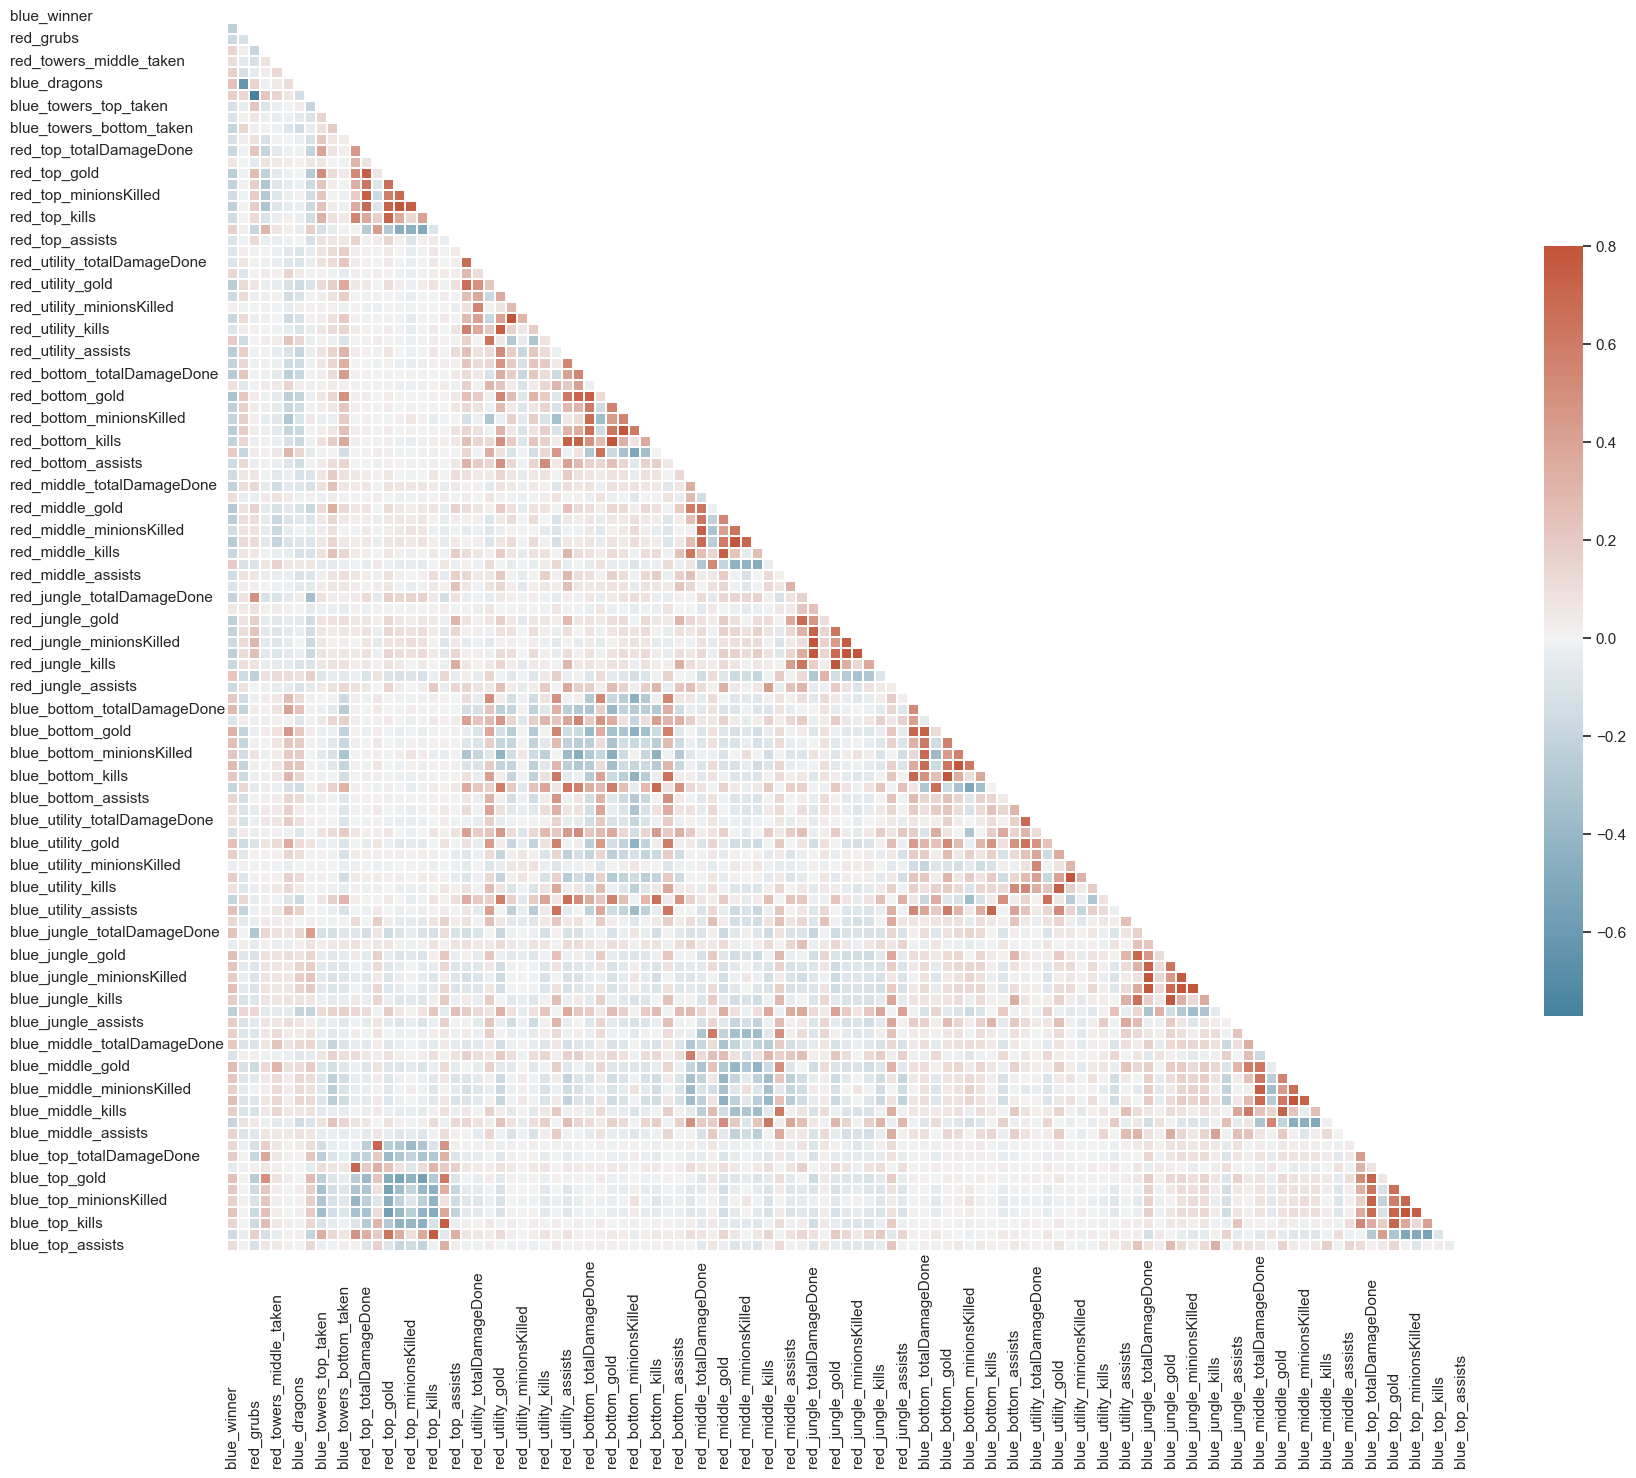

In [514]:
corr_heatmap(df.corr(), figsize=(20,20))

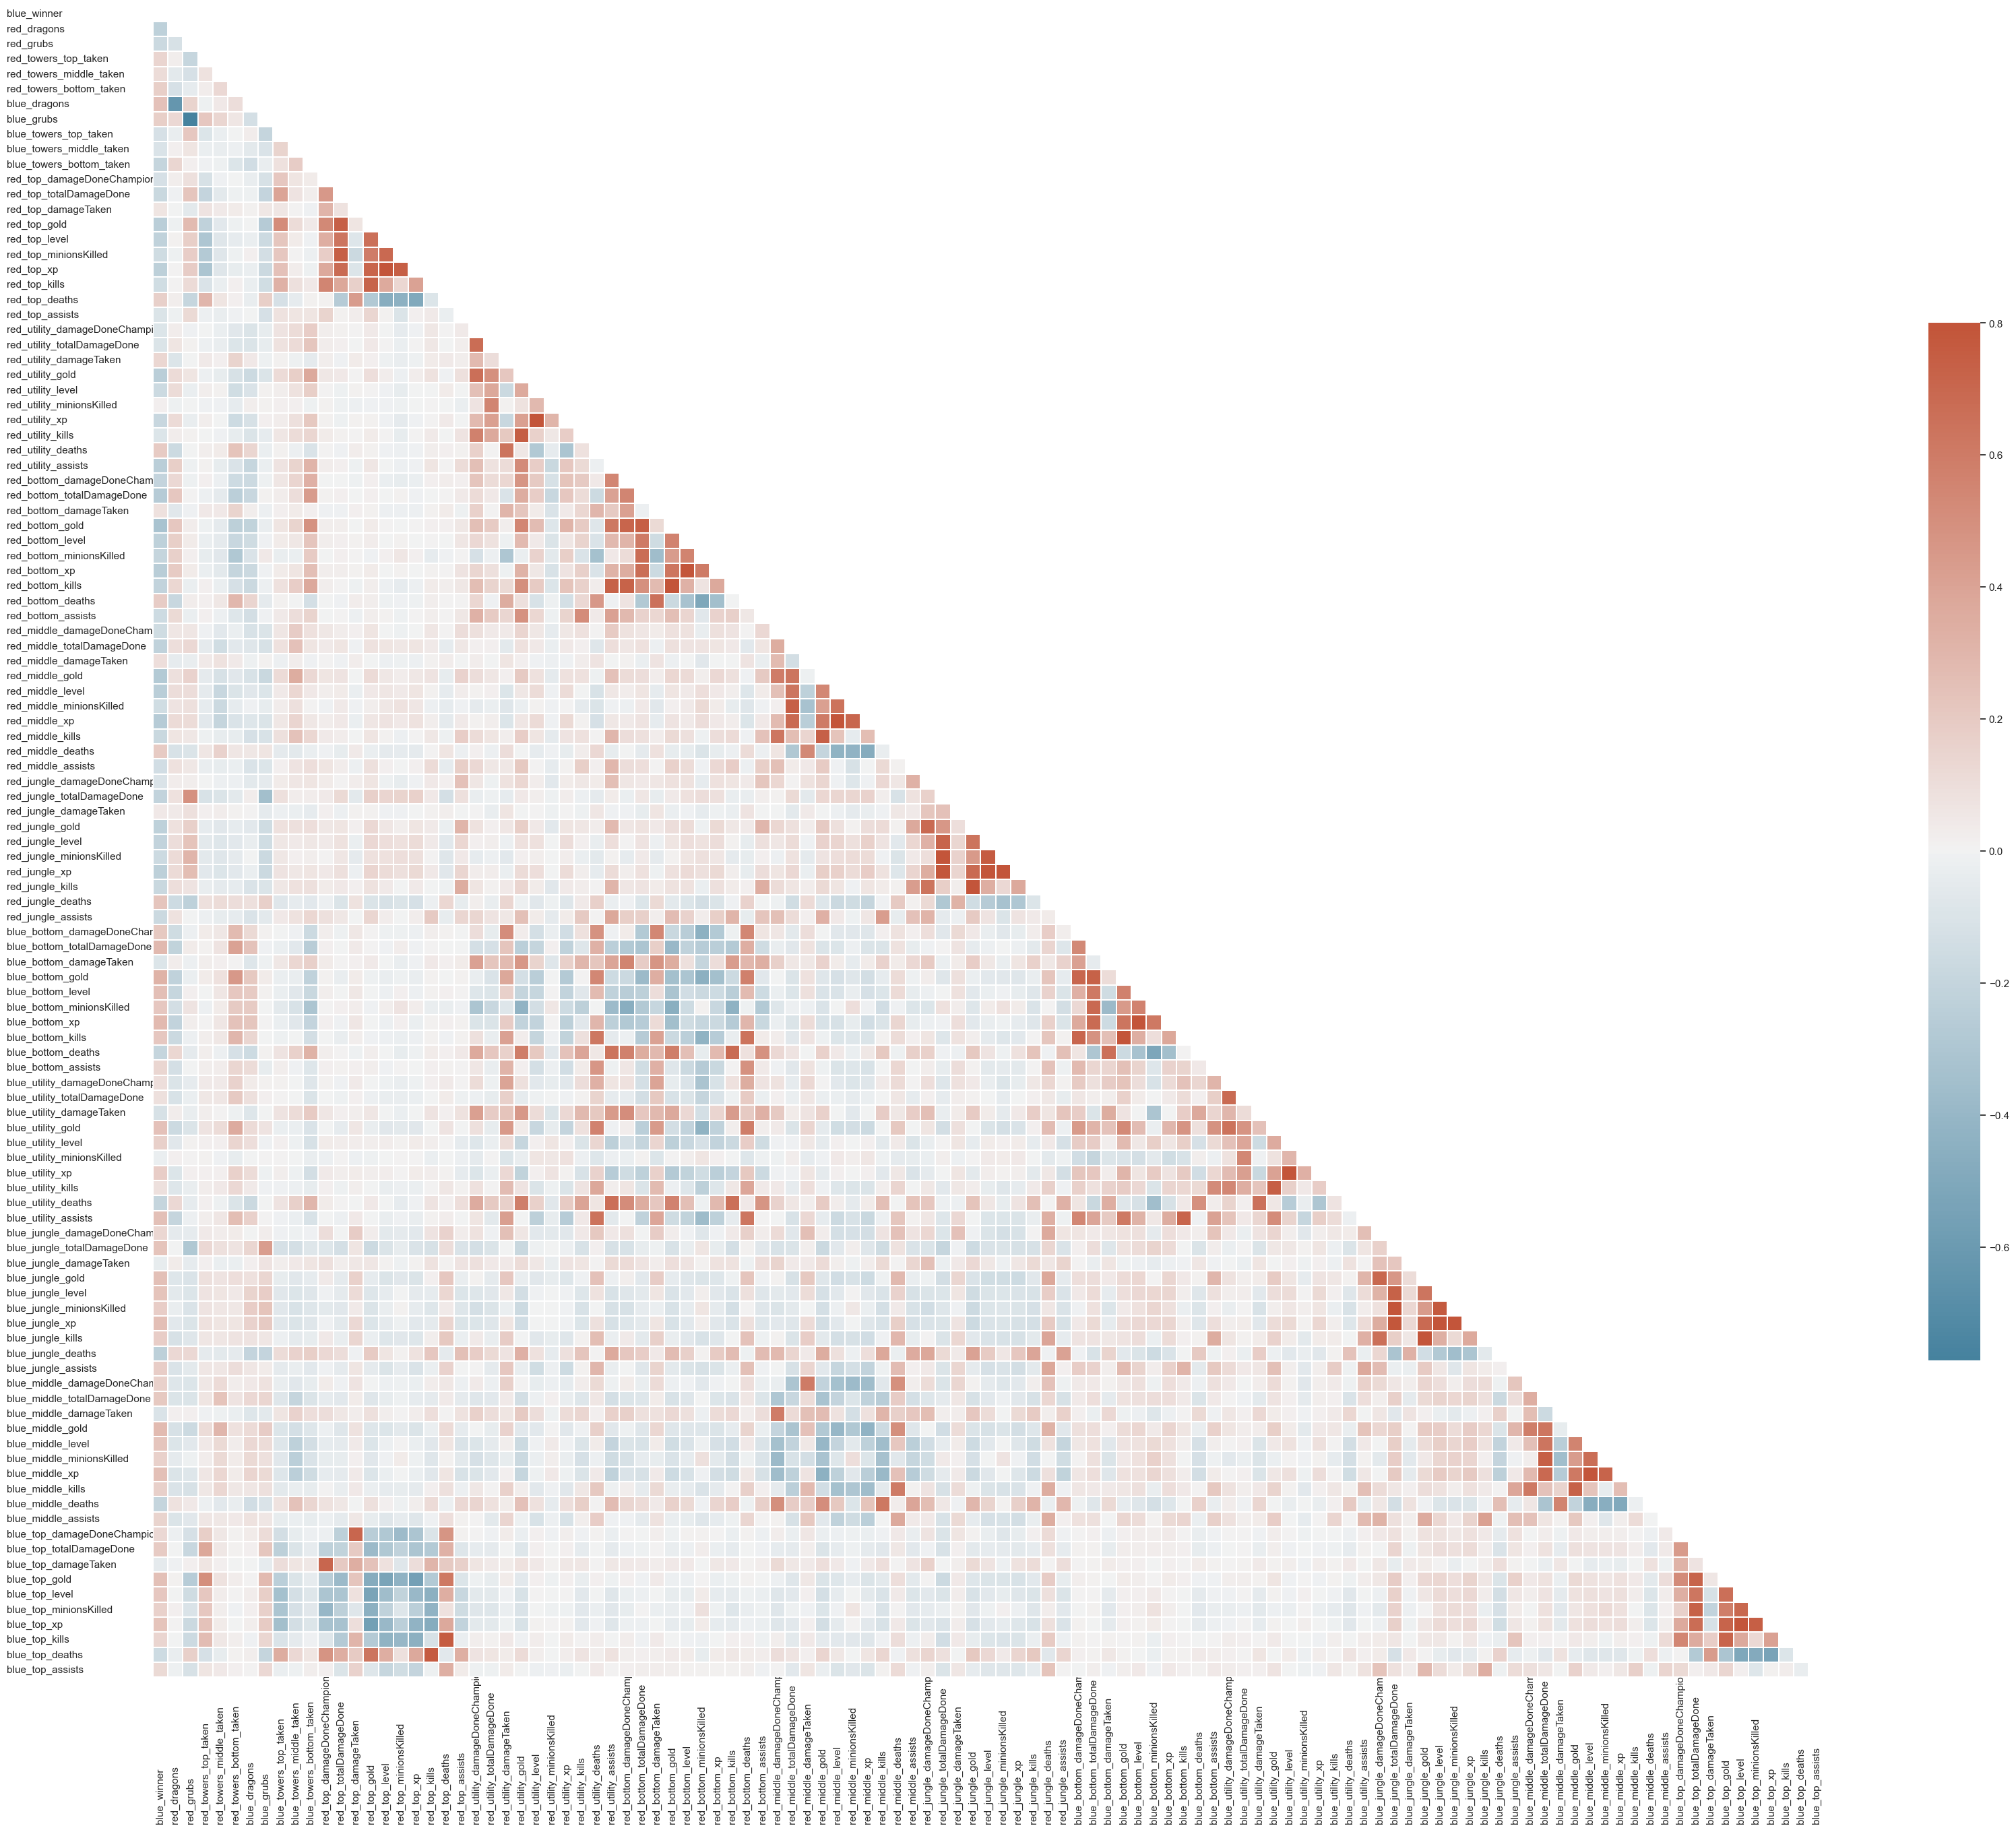

In [515]:
corr_heatmap(df.corr(), figsize=(40,40))

## Feature Engineering

In [587]:
remove_columns = (
    'damageDoneChampions', 
    'damageTaken', 
    'utility_totalDamageDone',
    'utility_damageDoneChampions',
    'utility_minionsKilled',
    'xp',
)
df_refined = df.drop(columns=list(filter(lambda s: s.endswith(remove_columns), df.columns)))

In [588]:
# Define teams and lanes
teams = ['blue', 'red']
lanes = ['bottom', 'middle', 'top', 'jungle', 'utility']

# Loop through teams and lanes to calculate KDA and create new columns
for team in teams:
    for lane in lanes:
        kills_col = f'{team}_{lane}_kills'
        deaths_col = f'{team}_{lane}_deaths'
        assists_col = f'{team}_{lane}_assists'
        
        # Calculate KDA
        df_refined[f'{team}_{lane}_kda'] = (df_refined[kills_col] + df_refined[assists_col]) / df_refined[deaths_col].replace(0, 1)
        
        # Drop the original kills, deaths, and assists columns
        df_refined = df_refined.drop([kills_col, deaths_col, assists_col], axis=1)

df_refined = df_refined[sorted(df_refined.drop(columns=['blue_winner']).columns)]
df_refined['blue_winner'] = df['blue_winner']


In [589]:
df_refined

,blue_bottom_gold,blue_bottom_kda,blue_bottom_level,blue_bottom_minionsKilled,blue_bottom_totalDamageDone,blue_dragons,blue_grubs,blue_jungle_gold,blue_jungle_kda,blue_jungle_level,...,red_top_level,red_top_minionsKilled,red_top_totalDamageDone,red_towers_bottom_taken,red_towers_middle_taken,red_towers_top_taken,red_utility_gold,red_utility_kda,red_utility_level,blue_winner
0,5324.0,0.500000,9.0,125.0,47694.0,1,2,5505.0,3.000000,9.0,...,10.0,89.0,45290.0,0,0,0,4488.0,4.000000,7.0,False
1,7532.0,4.000000,10.0,107.0,60147.0,2,3,7493.0,4.000000,10.0,...,9.0,81.0,34351.0,0,0,1,4265.0,1.142857,8.0,False
2,7031.0,2.000000,9.0,113.0,51349.0,0,3,5751.0,0.250000,10.0,...,11.0,104.0,51663.0,1,0,0,4735.0,6.000000,8.0,True
3,7359.0,1.666667,9.0,89.0,45309.0,0,5,5244.0,1.333333,9.0,...,12.0,125.0,75775.0,0,0,0,5346.0,2.000000,8.0,False
4,7532.0,6.000000,10.0,146.0,61251.0,2,5,6380.0,5.000000,9.0,...,10.0,67.0,34008.0,1,1,0,3328.0,1.000000,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,6850.0,5.000000,10.0,127.0,66570.0,1,5,6187.0,0.750000,10.0,...,10.0,89.0,34525.0,1,1,0,3444.0,0.666667,7.0,True
8124,5113.0,0.500000,9.0,119.0,43170.0,0,2,4954.0,0.200000,10.0,...,11.0,119.0,49258.0,0,0,0,5219.0,7.000000,8.0,False
8125,4562.0,0.500000,9.0,109.0,45626.0,0,3,6325.0,8.000000,10.0,...,9.0,78.0,32272.0,0,0,0,3845.0,1.500000,8.0,False
8126,5473.0,1.000000,10.0,103.0,48751.0,0,3,5490.0,3.000000,9.0,...,10.0,105.0,53237.0,0,0,0,5975.0,2.750000,7.0,True


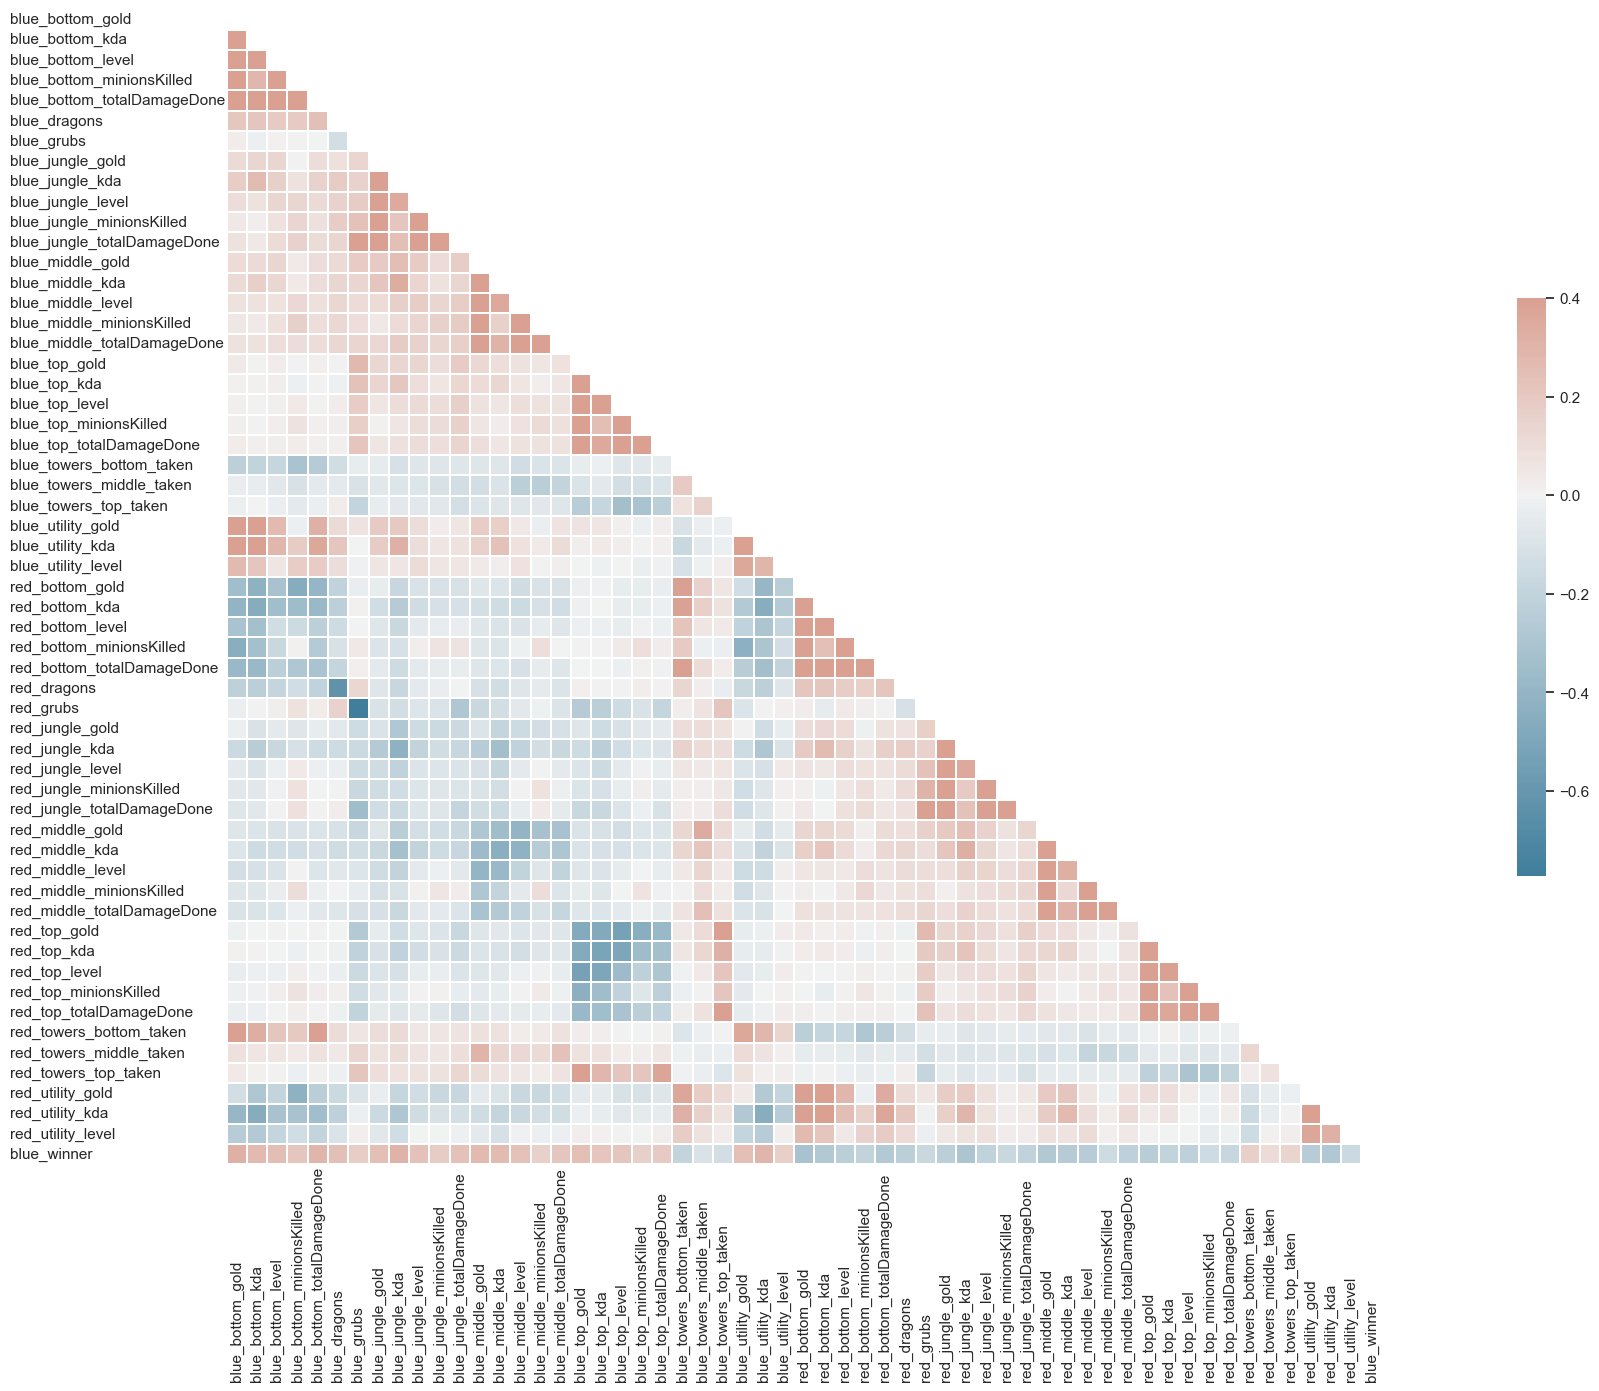

In [590]:
corr_heatmap(df_refined.corr())

## Helper Functions

In [538]:
def get_train_test(df):
    return train_test_split(df.drop(columns=['blue_winner']), melon['blue_winner'], test_size=0.3)

In [543]:
def train_pipeline(Classifier, gs_params, X_train, y_train):
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', Classifier())
    ])
    
    
    # Perform grid search with cross-validation
    gs = GridSearchCV(pipeline, gs_params, cv=5, scoring='accuracy')
    
    # Fit the model to the training data
    gs.fit(X_train, y_train)
    
    # After fitting, you can get the best model and parameters
    best_model = gs.best_estimator_
    best_params = gs.best_params_
    
    print("Best Parameters:", best_params)
    print("Best Accuracy:", gs.best_score_)
    
    return best_model

In [559]:
# Build the neural network
def get_nn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [598]:
X_train_og, X_test_og, y_train_og, y_test_og = get_train_test(df)
X_train, X_test, y_train, y_test = get_train_test(df_refined)

## Decision Tree Classifier

In [599]:
dtc = train_pipeline(
    DecisionTreeClassifier, 
    {
        'model__max_depth': [7, 10, 20, 30],
    }, 
    X_train, y_train
)

Best Parameters: {'model__max_depth': 7}
Best Accuracy: 0.6914113307815231


In [544]:
print('Decision Tree Classifier')
accuracy_score(y_test, dtc.predict(X_test))

Decision Tree Classifier


0.6804187192118226

In [600]:
dtc_og = train_pipeline(
    DecisionTreeClassifier, 
    {
        'model__max_depth': [7, 10, 20, 30],
    }, 
    X_train_og, y_train_og
)

Best Parameters: {'model__max_depth': 7}
Best Accuracy: 0.690009073791916


In [602]:
print('Decision Tree Classifier')
accuracy_score(y_test_og, dtc_og.predict(X_test_og))

Decision Tree Classifier


0.687192118226601

## Random Forest Classifier

In [603]:
rfc_params = {
    'model__max_depth': [7, 10, 20, 30],
    'model__max_features': [7, 10, 20]
}

rfc_model = train_pipeline(RandomForestClassifier, rfc_params, X_train, y_train)

Best Parameters: {'model__max_depth': 10, 'model__max_features': 20}
Best Accuracy: 0.7635478216705687


In [604]:
rfc_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, max_features=20))])

In [605]:
accuracy_score(y_test, rfc_model.predict(X_test))

0.7651888341543513

## HistGradientBoostingClassifier

In [561]:
params = {
    'max_depth': [10, 25, 50],
    'max_features': [0.3, 0.5, 0.7, 1],
    'learning_rate': [0.05, 0.1, 0.2, 0.5],
}

hgbc = train_pipeline(
    HistGradientBoostingClassifier, 
    {
        'model__max_depth': [7, 10, 20, 30],
    }, 
    X_train, y_train
)
accuracy_score(y_test, hgbc.predict(X_test))

Best Parameters: {'model__max_depth': 20}
Best Accuracy: 0.760732933219369


0.7508210180623974

## Simple DNN

In [608]:
nn = get_nn_model((len(X_train.columns),))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=10, batch_size=200)

# Evaluate the model
loss, accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict
y_pred = nn.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
print('Accuracy score', accuracy_score(y_test, y_pred))

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5179 - loss: 0.8621 
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 0.6697
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.6083
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6915 - loss: 0.6032
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7383 - loss: 0.5451
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7383 - loss: 0.5289
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7434 - loss: 0.5359
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - loss: 0.5135
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7521 - loss: 0.5202
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7487 - loss: 0.5190
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7568 - loss: 0.4985
Test Accuracy: 0.76
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
Accuracy score 0.75821